# USA Real Estate Pivot Tables Analysis

## This notebook contains:

I. libraries and data import

II. pivot table trend analysis

## I. libraries and data import

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os

In [3]:
# create path shortcut
path = r'C:\Users\lisag\Desktop\CF Work\Immersion 6 Tasks'

In [5]:
# import data set
df = pd.read_csv(os.path.join(path, 'USA Real Estate Final.csv'), index_col = False)

In [7]:
# recurring data cleaning
# drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])
# change 'brokered_by' to object/string data type
df['Broker Number'] = df['Broker Number'].astype('str')
# change 'zip_code' to object/string data type
df['Zip Code'] = df['Zip Code'].astype('str')
# convert to datetime format and replace zeros will NaT (Not a Time)
df['Last Sell Date'] = pd.to_datetime(df['Last Sell Date'], errors='coerce')

In [9]:
df.head()

,Broker Number,House Status,House Price,N. Beds,N. Baths,N. Acres,City,State,Zip Code,House SQFT,Last Sell Date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,1970-01-01
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,1970-01-01
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,1970-01-01
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,1970-01-01
4,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,1970-01-01


## II. pivot table trend analysis

In [16]:
pivot_price = pd.pivot_table(df, 
                             values='House Price', 
                             index='State', 
                             columns='House Status', 
                             aggfunc='mean', 
                             fill_value=0)
print(pivot_price)

House Status               for_sale           sold
State                                             
Alabama               260431.952478  238814.324089
Alaska                461269.784530       0.000000
Arizona               462836.202532  423494.137826
Arkansas              246713.852242  293341.206925
California            604304.571274  635992.264860
Colorado              530311.993232  454225.993565
Connecticut           394362.271629  280035.451613
Delaware              382437.669705  327847.647673
District of Columbia  664593.563898  718008.908491
Florida               422506.389230  357556.787865
Georgia               339728.491150  320226.534463
Guam                  547898.797872       0.000000
Hawaii                649371.412827  795612.794872
Idaho                 542640.540503  472395.393033
Illinois              279087.525684  275331.456456
Indiana               246692.338183  185144.677419
Iowa                  245002.604916  223160.260410
Kansas                279521.60

In [18]:
pivot_price = pd.pivot_table(df, 
                             values='House Price', 
                             index='State', 
                             columns='City', 
                             aggfunc='mean', 
                             fill_value=0)
print(pivot_price)

City                  Aaronsburg      Abbeville     Abbot     Abbotsford  \
State                                                                      
Alabama                      0.0  207772.500000       0.0       0.000000   
Alaska                       0.0       0.000000       0.0       0.000000   
Arizona                      0.0       0.000000       0.0       0.000000   
Arkansas                     0.0       0.000000       0.0       0.000000   
California                   0.0       0.000000       0.0       0.000000   
Colorado                     0.0       0.000000       0.0       0.000000   
Connecticut                  0.0       0.000000       0.0       0.000000   
Delaware                     0.0       0.000000       0.0       0.000000   
District of Columbia         0.0       0.000000       0.0       0.000000   
Florida                      0.0       0.000000       0.0       0.000000   
Georgia                      0.0  180000.000000       0.0       0.000000   
Guam        

In [24]:
# group by state and calculate mean & median
state_prices = df.groupby('State')['House Price'].agg(['mean', 'median']).reset_index().round(0)
# rename columns for clarity
state_prices.columns = ['State', 'Average Price', 'Median Price']
print(state_prices)

                   State  Average Price  Median Price
0                Alabama       252846.0      229000.0
1                 Alaska       461270.0      439000.0
2                Arizona       440244.0      410000.0
3               Arkansas       259183.0      238000.0
4             California       624207.0      604990.0
5               Colorado       512337.0      498000.0
6            Connecticut       393836.0      340000.0
7               Delaware       356981.0      330000.0
8   District of Columbia       698176.0      699900.0
9                Florida       394736.0      355000.0
10               Georgia       330689.0      306990.0
11                  Guam       547899.0      559500.0
12                Hawaii       652839.0      675000.0
13                 Idaho       515211.0      489400.0
14              Illinois       277413.0      249900.0
15               Indiana       246284.0      225000.0
16                  Iowa       234354.0      208000.0
17                Kansas    

In [26]:
# create 5 price categories based on quantiles
state_prices['Price Category'] = pd.qcut(state_prices['Median Price'], 5, labels=[1, 2, 3, 4, 5])
print(state_prices)

                   State  Average Price  Median Price Price Category
0                Alabama       252846.0      229000.0              2
1                 Alaska       461270.0      439000.0              4
2                Arizona       440244.0      410000.0              4
3               Arkansas       259183.0      238000.0              2
4             California       624207.0      604990.0              5
5               Colorado       512337.0      498000.0              5
6            Connecticut       393836.0      340000.0              4
7               Delaware       356981.0      330000.0              3
8   District of Columbia       698176.0      699900.0              5
9                Florida       394736.0      355000.0              4
10               Georgia       330689.0      306990.0              3
11                  Guam       547899.0      559500.0              5
12                Hawaii       652839.0      675000.0              5
13                 Idaho       515

In [44]:
state_prices['Price Category'].value_counts()

Price Category
1    11
2    11
4    11
5    11
3    10
Name: count, dtype: int64

In [46]:
# calculate quartile bin edges
quartiles = pd.qcut(state_prices['Median Price'], 5, retbins=True)
# display bin edges
print("Quartile Ranges:", quartiles[1])

Quartile Ranges: [135000. 227400. 287800. 338000. 470998. 699900.]


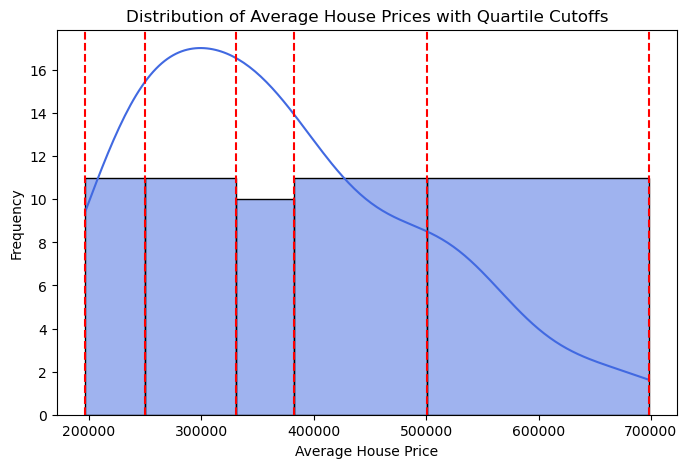

In [52]:
# extract bin edges
quartile_bins = pd.qcut(state_prices['Average Price'], 5, retbins=True)[1]
# plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(state_prices['Average Price'], bins=quartile_bins, kde=True, color='royalblue')
# add vertical lines for quartiles
for q in quartile_bins:
    plt.axvline(q, color='red', linestyle='dashed')

plt.xlabel('Average House Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average House Prices with Quartile Cutoffs')
plt.show()

In [54]:
# erge original dataframe with aggregated state-level prices
df = df.merge(state_prices, on='State', how='left')
print(df.head())

  Broker Number House Status  House Price  N. Beds  N. Baths  N. Acres  \
0      103378.0     for_sale     105000.0      3.0       2.0      0.12   
1       52707.0     for_sale      80000.0      4.0       2.0      0.08   
2      103379.0     for_sale      67000.0      2.0       1.0      0.15   
3       31239.0     for_sale     145000.0      4.0       2.0      0.10   
4      103378.0     for_sale     179000.0      4.0       3.0      0.46   

            City        State Zip Code  House SQFT Last Sell Date  \
0       Adjuntas  Puerto Rico    601.0       920.0     1970-01-01   
1       Adjuntas  Puerto Rico    601.0      1527.0     1970-01-01   
2     Juana Diaz  Puerto Rico    795.0       748.0     1970-01-01   
3          Ponce  Puerto Rico    731.0      1800.0     1970-01-01   
4  San Sebastian  Puerto Rico    612.0      2520.0     1970-01-01   

   Average Price  Median Price Price Category  
0       215109.0      135000.0              1  
1       215109.0      135000.0              

In [56]:
# export merged dataframe
df.to_csv(os.path.join(path, 'USA Real Estate Tableau.csv'))